## 1. Откройте и изучите файл

In [1]:
# загрузка необходимых библиотек
# для осуществления операций с выборочной совокупностью
import pandas as pd
# для подготовки обучающего, тестового, валидационного множеств
from sklearn.model_selection import train_test_split
# для построения логистической регрессии
from sklearn.linear_model import LogisticRegression
# для построения деревьев решений
from sklearn.tree import DecisionTreeClassifier
# для построения моделей случайного леса
from sklearn.ensemble import RandomForestClassifier
# для вычисления доли правильных ответов
from sklearn.metrics import accuracy_score
# для графического представления результатов
import matplotlib.pyplot as plt
# установление темы диаграмм
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# загрузка массива данных
users = pd.read_csv('users_behavior.csv')

In [3]:
# вывод первых 5-ти наблюдений исходной выборочной совокупности
users.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
# вывод общей информации о переменных исходной выборочной совокупности
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Таким образом, по каждому из 3 214-ти абонентам мобильной связи "Мегалайн" имеем 5 показателей:
- calls: количество звонков (в месяц);
- minutes: суммарная длительность звонков в минутах (в месяц);
- messages — количество sms-сообщений (в месяц);
- mb_used — израсходованный интернет-трафик в Мб (в месяц);
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

С одной стороны, количество звонков, суммарная длительность звонков, израсходованный интернет, имеющие формат с плавающей точкой, являются тренировочными признаками. С другой стороны, тип тарифа, имеющий целочисленный формат, является целевым признаком.

#### Промежуточные выводы
- по каждому из 3 214-ти абонентам мобильной связи "Мегалайн" имеем 5 показателей:
- количество звонков, суммарная длительность звонков, израсходованный интернет, имеющие формат с плавающей точкой, являются **тренировочными признаками**
- тип тарифа, имеющий целочисленный формат, является **целевым признаком**.

## 2. Разбейте данные на выборки

Так как спрятаной тестовой выборки нет, то поделим исходную выборочную совокупность на обучающее, тестовое и валидационное множества в соотношении 3:1:1, что в процентном выражении составляет 60:20:20.

Во-первых, поделим исходную выборочную совокупность на обучающее и тестовое множества в процентном выражении 80:20. Во-вторых, чтобы уровнять число входящих объектов тестового и валидационного множеств поделим обучающее множество в процентном выражении 75:25, так как 25 процентов от тестового множества равно 20-ти процентам исходной выборочной совокупности: 0.8 * 0.25 = 0.2. Если же выберем 20 процентов от обучающего множества, то количество объектов валидационного множества равна 16-ти процентам исходной выборочной совокупности: 0.8 * 0.2 = 0.16, что меньше количества объектов тестового множества.

In [5]:
# Посредством функции train_test_split поделим исходную выборочную совокупность на следующие множества
# (а) обучающее users_train, (б) тестовое users_test
users_train, users_test = train_test_split(users, test_size=0.2, random_state=42)

In [6]:
# Аналогично, посредством функции train_test_split поделим обучающее множество users_train на следующие множества:
# (в) обучающее users_train, (г) валидационное users_valid
users_train, users_valid = train_test_split(users_train, test_size=0.25, random_state=42)

In [7]:
# Проверим правильность предположений о количестве объектов, входящих в
# исходное, обучающее, тестовое, валидационное множества.
print('Число объектов множества - (а) исходное: {}, (б) обучающее: {}, (в) тестовое: {}, (г) валидационное: {}'
      .format(users.shape[0], users_train.shape[0], users_test.shape[0], users_valid.shape[0]))

Число объектов множества - (а) исходное: 3214, (б) обучающее: 1928, (в) тестовое: 643, (г) валидационное: 643


Действительно, число объектов тестового и валидационного множеств совпадают.

In [8]:
# Выделим тренировочные признаки:
# обучающего множества
features_train = users_train.drop(['is_ultra'], axis=1)
# тестового множества
features_test = users_test.drop(['is_ultra'], axis=1)
# валидационного множества
features_valid = users_valid.drop(['is_ultra'], axis=1)

# Выделим целевой признак (тип тарифа, а именно «Ультра» — 1, «Смарт» — 0):
# обучающего множества
target_train = users_train['is_ultra']
# тестового множества
target_test = users_test['is_ultra']
# валидационного множества
target_valid = users_valid['is_ultra']

#### Промежуточные выводы
- обучающее множество включает 1928 объектов, тестовое и валидационное множества имеют по 643 объекта.
- по каждому из трех множеств выделен (а) массив из 4-х тренировочных признаков, (б) один целовой признак.

## 3. Исследуйте модели

Так как перед нами стоит задача классификации, то используем (1) логистическую регрессию, (2) дерево решений, (3) модель случайного леса.

In [9]:
# (1) Инициализация логистической регрессии
logreg = LogisticRegression(random_state=42)
# Подгонка логистической регрессии на обучающем множестве
logreg.fit(features_train, target_train)
# Прогнозирование на основе валидационного множества
logreg_pred_valid = logreg.predict(features_valid)
logreg_accuracy_valid = accuracy_score(target_valid, logreg_pred_valid)
# Прогнозирование на основе обучающего множества
logreg_pred_train = logreg.predict(features_train)
logreg_accuracy_train = accuracy_score(target_train, logreg_pred_train)
# Вывод точности (количества правильных ответов) для логистической регрессии
print('Точность логистической регрессии на валидационном множестве составляет: {accuracy_valid:.4f}'
      .format(accuracy_valid=logreg_accuracy_valid))
print('Точность логистической регрессии на обучающем множестве составляет {accuracy_train:.4f}'
      .format(accuracy_train=logreg_accuracy_train))

Точность логистической регрессии на валидационном множестве составляет: 0.7201
Точность логистической регрессии на обучающем множестве составляет 0.7033


In [10]:
# Определяем пустые листы
# для точности моделей дерева решений, которые обучаются на
# валидационном множестве
decision_tree_accuracy_valid = []
# тренировочном множестве (для выявление переобучения)
decision_tree_accuracy_train = []

# Определяем цикл, который обучает модели дерева решений в зависимости от 
# (1) глубины дерева, в частности от 1 до 50 с шагом 1
for depth in range(1,51,1):
    # (а) строит модели деревьев решений в зависимости от глубины дерева (от 1 до 20-ти) (гиперпараметр)
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    # (б) подгоняет деревья решений на основе обучающего множества
    decision_tree.fit(features_train, target_train)
    # (в) определяет прогнозы на основе валидационного множества
    decision_tree_pred_valid = decision_tree.predict(features_valid)
    # (г) определяет прогнозы на основе обучающего множества
    decision_tree_pred_train = decision_tree.predict(features_train)
    # (д) определяет лист с точностью моделей деревьев решений
    decision_tree_accuracy_valid.append(accuracy_score(target_valid, decision_tree_pred_valid) )
    # (е) определяет лист с точностью моделей деревьев решений на основе обучающего множества
    decision_tree_accuracy_train.append(accuracy_score(target_train, decision_tree_pred_train))

In [11]:
# Сформирурем базу данных, которая содержит точность моделей деревьев решений в разрезе
decision_tree_results = pd.DataFrame({'dtree_valid': decision_tree_accuracy_valid, # валидационного мн-ва
                                      'dtree_train': decision_tree_accuracy_train}) # обучающего множества

In [12]:
# Аналогично, определяем пустые листы
# для точности моделей случайного леса, которые обучаются
# на основе валидационного множества
random_forest_accuracy_valid = []
# на основе тренировочного множества (чтобы проследить насколько модель переобучается)
random_forest_accuracy_train = []

# Определяем цикл, который обучает модели случайного леса в зависимости от
# (1) количестве деревьев, в частности от 1-го до 100 с шагом 10
for estimator in range(1,101,10):
    # (2) максимальной глубины деревьев, в частности от 1-го до 10-ти с шагом 2
    for depth in range(1,11,2):
            # (а) строит модели случайного леса
            random_forest = RandomForestClassifier(random_state=42, n_estimators=estimator, max_depth=depth)
            # (б) подгоняет случайный лес на основе обучающего множества (этап обучения)
            random_forest.fit(features_train, target_train)
            # (в) определяет прогнозы на основе валидационного множества
            random_forest_pred_valid = random_forest.predict(features_valid)
            # (г) определяет прогнозы на основе обучающего множества
            random_forest_pred_train = random_forest.predict(features_train)
            # (д) определяет лист с точностью моделей случайного леса на основе валидационного множества
            random_forest_accuracy_valid.append(accuracy_score(target_valid, random_forest_pred_valid))
            # (е) определяет лист с точностью моделей случайного леса на основе обучающего множества
            random_forest_accuracy_train.append(accuracy_score(target_train, random_forest_pred_train))

In [13]:
# Сформируем базу данных, которая содержит точность моделей случайного леса в разрезе
random_forest_results = pd.DataFrame({'rforest_valid': random_forest_accuracy_valid, # валидационного мн-ва
                                      'rforest_train': random_forest_accuracy_train}) # обучающего множества

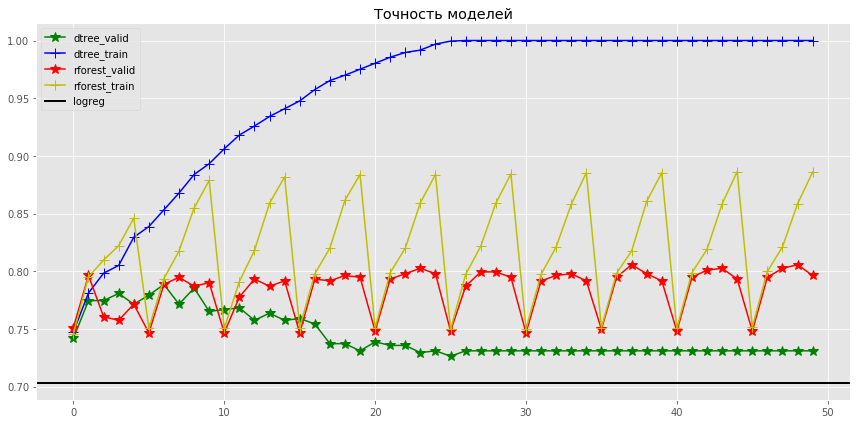

In [14]:
# Определим графическую иллюстрацию точности
# для дерева решений
ax1 = decision_tree_results.plot(style=['g*-','b+-'], figsize=(12,6), markersize=10)
# для случайного леса
random_forest_results.plot(style=['r*-','y+-'], ax=ax1, markersize=10)
# для логистической регрессии
plt.axhline(y=logreg_accuracy_train, c='k', label='logreg', lw=2)
# Вывод легенды
plt.legend()
# Вывод заголовка диаграммы
plt.title('Точность моделей')
plt.tight_layout()

#### Промежуточные выводы
- Деревья решений с глубиной более 25 имеют тенденцию к переобучению, что отражается единичной (полной) точностью на обучающем множестве и асиптомтической точностью приблизительно 0.74 на валидационном множестве
- Деревья решений с глубиной более 6-ти имеют тенденцию сокращения точности в разрезе валидационного множества
- Случайный лес имеет сезонные колебания точности: (а) каждый пятый шаг максимальной глубины деревьев наблюдается резкий спад точности моделей в разрезе как валидационного, так и обучающего множеств, (б) на каждом девятом шаге глубины деревьев наблюдается пик точности
- Случайный лес с более чем 15-ью деревьями имеет асимпотическую точность приблизительно в размере 0.88.
- Случайный лес с более 7-ью деревьями имеет тенденцию к сокращению точности вплоть до 10-ти деревьев.

Таким образом, с учетом переобучения наибольшую точность на валидационном множестве обеспечивают (1) модель дерева решений с 6-ой глубиной, (2) модель случайного леса с 7-ью деревьями и максимальной глубиной глубиной деревьев в размере 4.

## 4. Проверьте модель на тестовой выборке

Обученные модели $-$ логистическая регрессия, дерево решений, случайный лес $-$ апробируем на тестовом множестве. Опираясь на результаты третьего шага исследования, алгоритм дерева решений **с 6-ой глубиной** и алгоритм случайного леса **с 7-ью деревьями с максимальной глубиной последних в размере 4-х** продемонстрировали наибольшую точность и наименьшую среднеквадратическую ошибку. Тем самым, определим модели на основе данных гиперпараметров.

In [15]:
# Классификация на основе тестового множества посредством
# (1) логистической регрессии
logreg_pred_test = logreg.predict(features_test)
# Вывод точности (количество правильных ответов) и среднеквадратической ошибки для логистической регрессии
print('Логистическая регрессия: точность {:.4f}'.format(accuracy_score(target_test,logreg_pred_test)))

# (2) дерева решений с 6-ой глубиной
dec_tree_6_depth = DecisionTreeClassifier(max_depth=6, random_state=42)
dec_tree_6_depth.fit(features_train, target_train)
dec_tree_6_depth_pred = dec_tree_6_depth.predict(features_test)
# Вывод точности (количество правильных ответов) и среднеквадратической ошибки для логистической регрессии
print('Дерево решений: точность {:.4f}'.format(accuracy_score(target_test, dec_tree_6_depth_pred)))

# (3) случайного леса с 7-ью деревьями с максимальной глубиной деревьев 
rand_forest_7_est = RandomForestClassifier(n_estimators=7, random_state=42, max_depth=4)
rand_forest_7_est.fit(features_train, target_train)
rand_forest_7_est_pred = rand_forest_7_est.predict(features_test)
# Вывод точности (количество правильных ответов) и среднеквадратической ошибки для логистической регрессии
print('Случайный лес: точность {:.4f}'.format(accuracy_score(target_test, rand_forest_7_est_pred)))

Логистическая регрессия: точность 0.7030
Дерево решений: точность 0.7932
Случайный лес: точность 0.8040


#### Промежуточные выводы (обновленные)
- на тестовом множестве наибольшую точность демонстирует случайный лес 0.8040, далее, дерево решений 0.7932, затем логистическая регрессия 0.70

*Действительно, при настройке максимальной глубины деревьев случайного леса точность модели случайного леса повысилась с 0.7792 до 0.8040*

## 5. (бонус) Проверьте модели на адекватность

In [16]:
# Определим долю абонентов в разрезе тарифов («Ультра» — 1, «Смарт» — 0)
users['is_ultra'].value_counts() / users.shape[0]

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Тем самым, 69.35% исходной выборочной совокупности состоит из абонентов с тарифом "Смарт", 30.65% абонентов подключены к тарифу "Ультра".

#### Промежуточные выводы
Таким образом, обученные модели демонстрируют адекватную точность: полученная на основе тестового множества точность обученных моделей превышает вероятность случайным образом правильно классифицировать абонентов по тарифам.